In [1]:
import pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl, numpy as np
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.interpolate import interp1d

/Users/jackson/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Text(0.5, 1.0, 'Reflectivity')

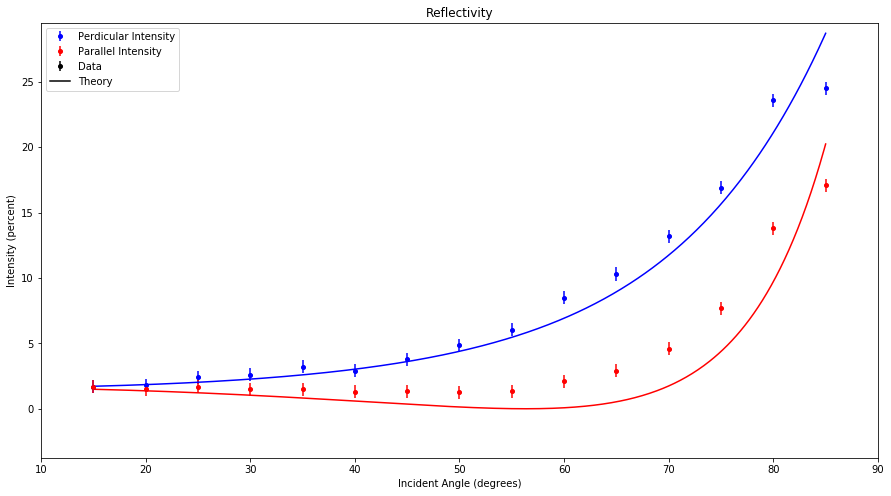

In [67]:
data = pd.read_excel("Lab7Data.xlsx", sheet_name = f"Sheet1")
angle = data["angle"][0:15]
Iperp = data["Ivertical"][0:15]
Ipar = data["Ihorizontal"][0:15]

n = 1.5
def perp(incident, a, b):
    refraction = np.arcsin(1 / n * np.sin(incident))
    return a * ( (np.cos(incident) - n*np.cos(refraction)) / (np.cos(incident) + n*np.cos(refraction)) )**2 + b*0

def par(incident, a, b):
    refraction = np.arcsin(1 / n * np.sin(incident))
    return a * ( (n*np.cos(incident) - np.cos(refraction)) / (n*np.cos(incident) + np.cos(refraction)) )**2 + b*0

angle_synth = np.linspace(min(angle), max(angle), 500)

initialParameters = [20, 3]
finalParameters, parCov = curve_fit(perp, angle*np.pi/180, Iperp, sigma = None, p0=initialParameters, absolute_sigma=False)
a_perp, b_perp = finalParameters

finalParameters, parCov = curve_fit(par, angle*np.pi/180, Ipar, sigma = None, p0=initialParameters, absolute_sigma=False)
a_par, b_par = finalParameters

perp_synth = perp(angle_synth * np.pi / 180, a_perp, b_perp)
par_synth = par(angle_synth * np.pi / 180, a_par, b_par)

error = [0.5 for i in Ipar]

fig, ax = plt.subplots(figsize = (15,8))

p1 = ax.errorbar(angle, Iperp, error, None, marker = 'o', color = "blue", linestyle = '', 
    label = "Perdicular Intensity", ms = 4, elinewidth = 1.5)
p2 = ax.errorbar(angle, Ipar, error, None, marker = 'o', color = "red", linestyle = '', 
    label = "Parallel Intensity", ms = 4, elinewidth = 1.5)

t1, = ax.plot(angle_synth, perp_synth, color = "blue")
t2, = ax.plot(angle_synth, par_synth, color = "red")

p3 = ax.errorbar([-500], [-500], .5, None, marker = 'o', color = "black", linestyle = '', 
    label = "Data", ms = 4, elinewidth = 1.5)
t3, = ax.plot([-500], [-500], color = "black", label = "Theory")

ax.set_xlim(min(angle)-5, max(angle)+5)
ax.set_ylim(min(Ipar)-5, max(Iperp)+5)

ax.legend(handles=[p1, p2, p3, t3], loc = "upper left")
ax.set_xlabel("Incident Angle (degrees)")
ax.set_ylabel("Intensity (percent)")
ax.set_title("Reflectivity")


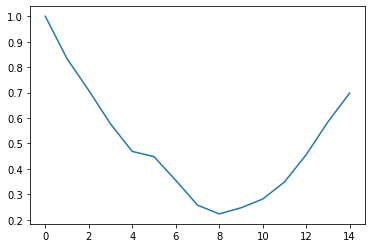

In [68]:
plt.plot(Ipar/Iperp)

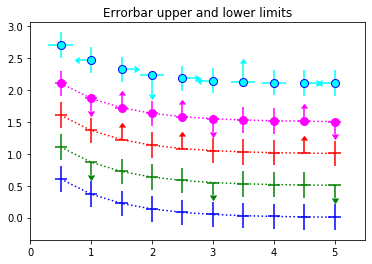

In [29]:
"""
Demo of the errorbar function, including upper and lower limits
"""
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.5, 5.5, 0.5)
y = np.exp(-x)
xerr = 0.1
yerr = 0.2
ls = 'dotted'

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# standard error bars
plt.errorbar(x, y, xerr=xerr, yerr=yerr, ls=ls, color='blue')

# including upper limits
uplims = np.zeros(x.shape)
uplims[[1, 5, 9]] = True
plt.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims, ls=ls,
             color='green')

# including lower limits
lolims = np.zeros(x.shape)
lolims[[2, 4, 8]] = True
plt.errorbar(x, y + 1.0, xerr=xerr, yerr=yerr, lolims=lolims, ls=ls,
             color='red')

# including upper and lower limits
plt.errorbar(x, y + 1.5, marker='o', ms=8, xerr=xerr, yerr=yerr,
             lolims=lolims, uplims=uplims, ls=ls, color='magenta')

# including xlower and xupper limits
xerr = 0.2
yerr = np.zeros(x.shape) + 0.2
yerr[[3, 6]] = 0.3
xlolims = lolims
xuplims = uplims
lolims = np.zeros(x.shape)
uplims = np.zeros(x.shape)
lolims[[6]] = True
uplims[[3]] = True
plt.errorbar(x, y + 2.1, marker='o', ms=8, xerr=xerr, yerr=yerr,
             xlolims=xlolims, xuplims=xuplims, uplims=uplims, lolims=lolims,
             ls='none', mec='blue', capsize=0, color='cyan')

ax.set_xlim((0, 5.5))
ax.set_title('Errorbar upper and lower limits')
plt.show()

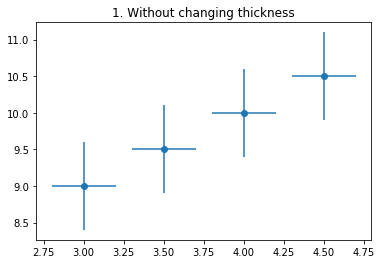

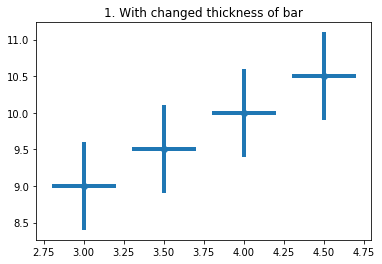

In [39]:
# importing necessary libraries
import matplotlib.pyplot as plt

# example data
x = np.arange(3, 5, 0.5)
y = np.arange(9, 11, 0.5)

# ploting with default thickness of bar
plt.title("1. Without changing thickness")
plt.errorbar(x, y, xerr=0.2, yerr=0.6, fmt='o')
plt.show()

# ploting with changed thickness of bar
plt.title("1. With changed thickness of bar")

# change elinwidth to change the thickness of bar
plt.errorbar(x, y, xerr=0.2, yerr=0.6, fmt='o', elinewidth=4)
plt.show()

